In [52]:
import os.path as op

import matplotlib.pyplot as plt
import numpy as np
import seaborn

from classypy.util.dirs import add_to_path, data_dir, repo_dir
add_to_path(op.join(repo_dir(), "irs"))
from irs_shared import get_annotated_2018, get_filtered_2018

font = {'font.family' : 'Arial',
        'font.weight' : 'normal',
        'font.size'   : 22}
plt.rcParams.update(**font)


In [3]:
df = get_annotated_2018()
df2 = get_filtered_2018()


Installing missing dependencies 'xlsx2csv', for <class 'classypy.io.irs.tax_extract.IrsTaxExtractFetcher'>
Installing xlsx2csv from xlsx2csv...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None


Using legacy 'setup.py install' for xlsx2csv, since package 'wheel' is not installed.
    Running setup.py install for xlsx2csv: started
    Running setup.py install for xlsx2csv: finished with status 'done'


distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Installing missing dependencies 'bs4', for <class 'classypy.io.irs.tax_extract.IrsTaxExtractFetcher'>
Installing bs4 from bs4...


distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None


  Using cached bs4-0.0.1-py3-none-any.whl
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)


distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Installing missing dependencies 'html5lib', for <class 'classypy.io.irs.tax_extract.IrsTaxExtractFetcher'>
Installing html5lib from html5lib...


distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None


  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None


www.irs.govstatisticssoi-tax-stats-annual-extract-of-tax-exempt-organization-financial-data is cached, skipping download.
py16_990pf.dat is cached, skipping download.py17_EZ.dat is cached, skipping download.py16_990.dat is cached, skipping download.

py16_ez.dat is cached, skipping download.
py17_990.dat is cached, skipping download.

18eoextract990.xlsx is cached, skipping download.
19eoextractez.xlsx is cached, skipping download.
19eoextract990.xlsx is cached, skipping download.
18eoextractez.xlsx is cached, skipping download.
04/25 08:32:13 - INFO - Saved dataframe to tax_extract_4years.csv
Saved dataframe to tax_extract_4years.csv
04/25 08:32:41 - INFO - Saved dataframe to eobmf.csv
Saved dataframe to eobmf.csv
04/25 08:33:50 - INFO - Saved dataframe to annotated_irs_2018.csv
Saved dataframe to annotated_irs_2018.csv
04/25 08:33:51 - INFO - Saved dataframe to annotated_irs_2018_filtered.csv
Saved dataframe to annotated_irs_2018_filtered.csv


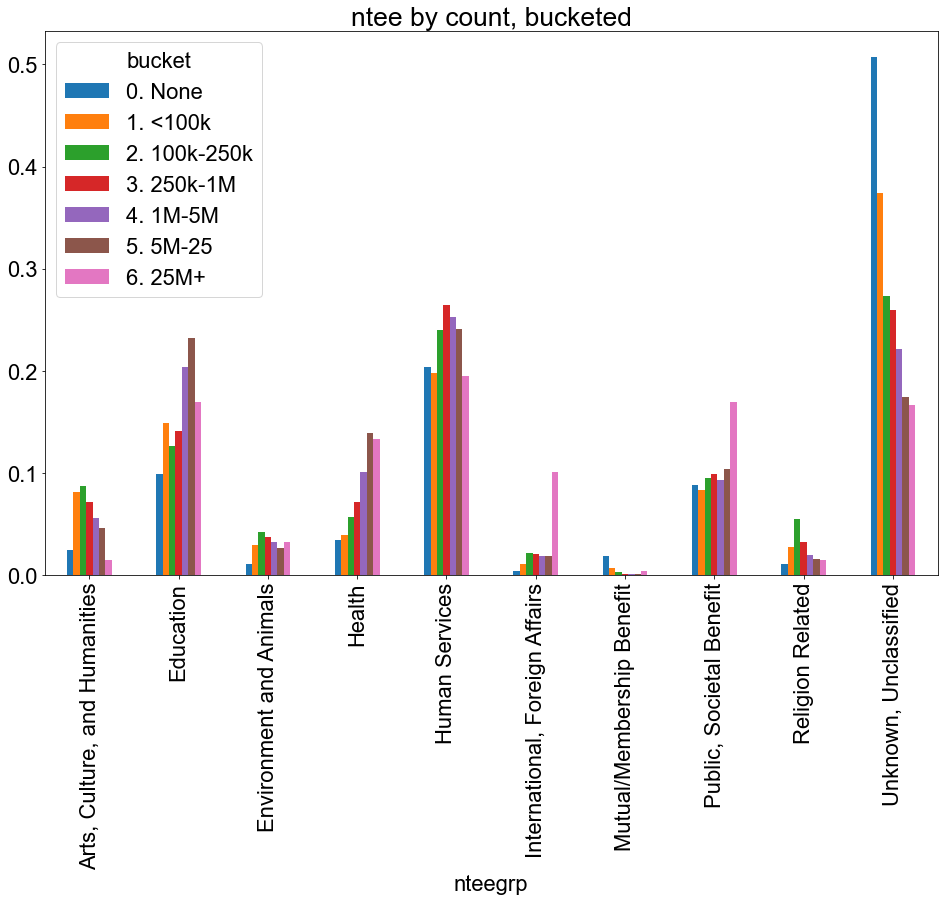

In [38]:
xyz = df.groupby("bucket").nteegrp.value_counts().to_frame("num_rows").reset_index()
xyz = xyz.join(xyz.groupby("bucket").num_rows.sum().to_frame("total_rows"), on="bucket").assign(pct=lambda row: row.num_rows/row.total_rows)
xyz.pivot(index="nteegrp", columns="bucket", values="pct").plot.bar().set_title("ntee by count, bucketed").figure.set_size_inches((16,10))


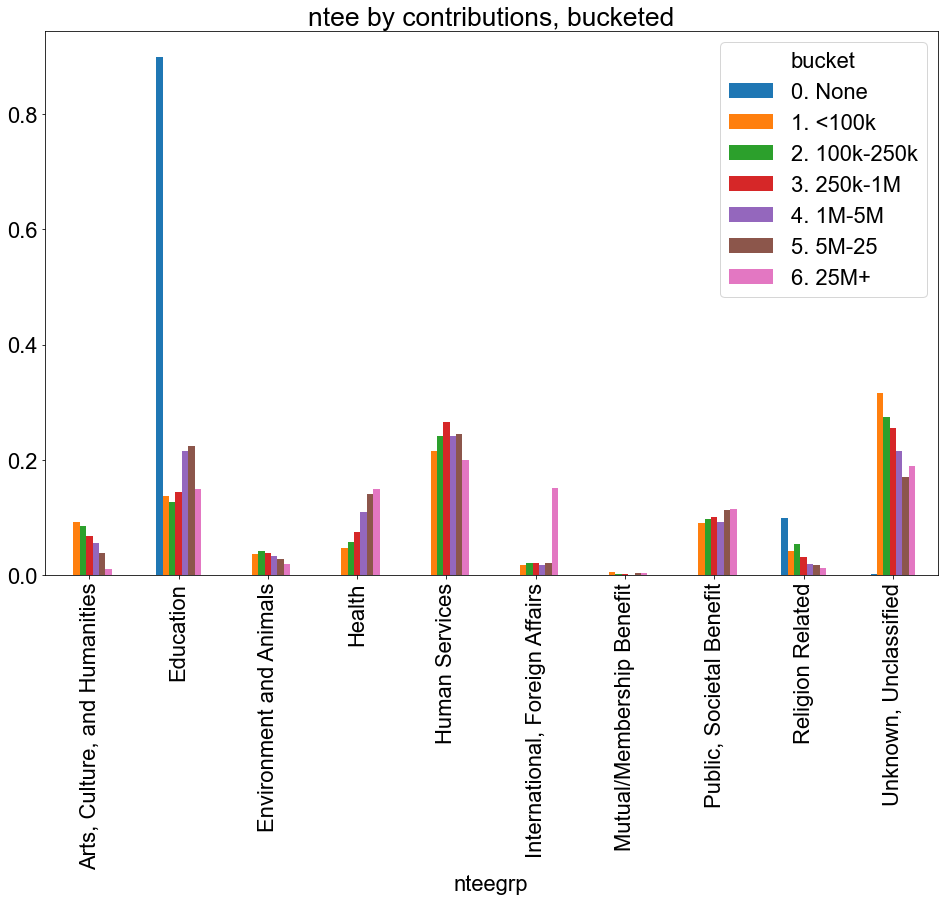

In [41]:
xyz = df.groupby(["bucket", "nteegrp"]).contributions.sum().to_frame("num_rows").reset_index()
xyz = xyz.join(xyz.groupby("bucket").num_rows.sum().to_frame("total_rows"), on="bucket").assign(pct=lambda row: row.num_rows/row.total_rows)
xyz.pivot(index="nteegrp", columns="bucket", values="pct").plot.bar().set_title("ntee by contributions, bucketed").figure.set_size_inches((16,10))


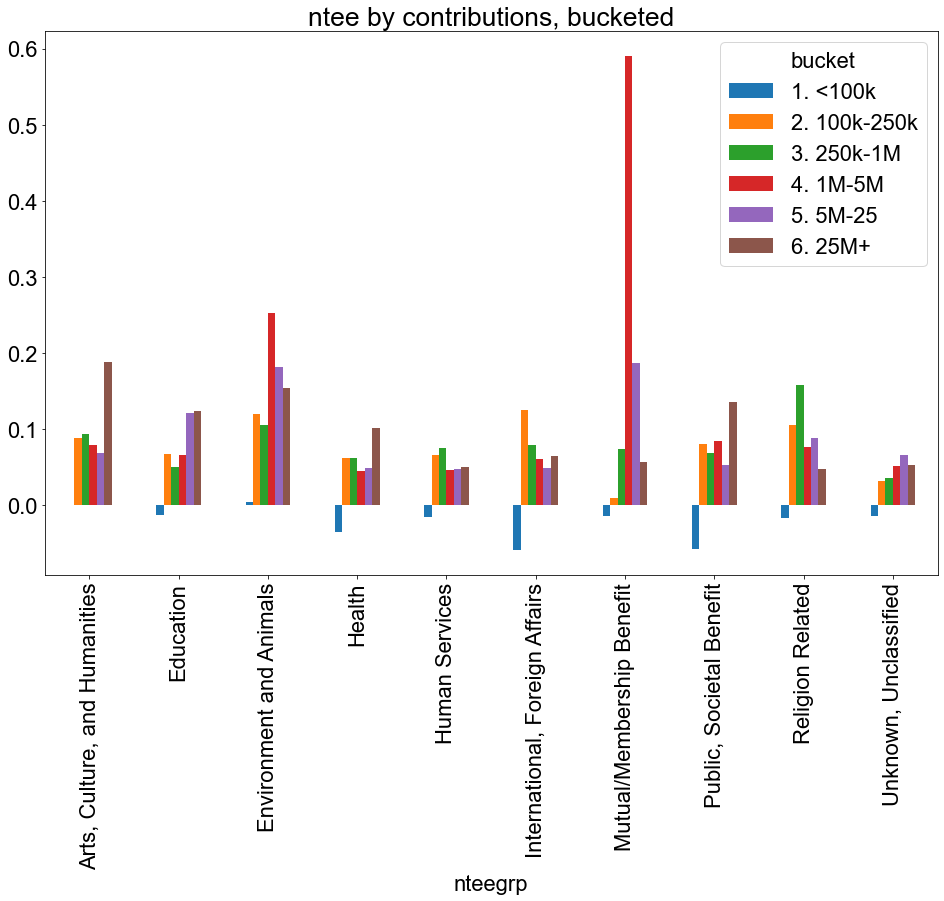

In [69]:
xyz = df[(~np.isinf(df.growth.values)) & (df.bucket != "0. None")].groupby(["bucket", "nteegrp"]).growth.median().to_frame("num_rows").reset_index()
xyz = xyz.join(xyz.groupby(["bucket", "nteegrp"]).num_rows.median().to_frame("total_rows"), on=["bucket", "nteegrp"])
xyz.pivot(index="nteegrp", columns="bucket", values="total_rows").plot.bar().set_title("median growth, bucketed by total size").figure.set_size_inches((16,10))
